<a href="https://colab.research.google.com/github/thgemanuel/Exercicio-3-Topicos-em-Inteligencia-Computacional/blob/main/Ajuste_do_modelo_de_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Ajuste do modelo de RL**


# Exercício 3

Aluno: Thiago Emanuel

Considere, as características da base de dados Diabetes do exercício anterior:

Para cada característica individualmente calcule o R2, mostre o histograma e o gráfico de resíduos, e calcule o teste de normalidade. Compare o resultado com a característica "age".
Adicionalmente, também mostre o histograma e o gráfico de resíduos, para o processo com as duas características (regressão com duas variáveis) do exercício anterior.


# **Base de dados Diabetes**
---



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


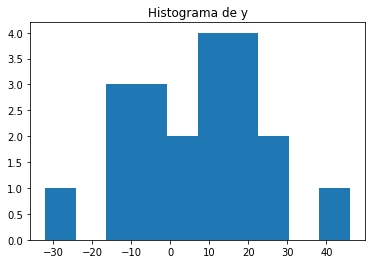

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
from sklearn import linear_model
from sklearn.datasets import load_diabetes
from statsmodels.stats.diagnostic import normal_ad
from sklearn.metrics import r2_score

diabetes = load_diabetes()
y = np.array([0.6,-12,-2.5,2,-15,46,25,17.08,17,15.29,10,13.7,-3,24,14,16,-32,14,-0.9,-15])
tabela = pandas.DataFrame(diabetes.data)
tabela.columns = diabetes.feature_names
tabela['y'] = diabetes.target

plt.hist(y)
plt.title('Histograma de y')
plt.show()


In [2]:
X = tabela['age']
X_treinamento = X[:-20].array.to_numpy().reshape(-1,1)
X_teste = X[-20:].array.to_numpy().reshape(-1,1)

X_bmi = tabela['bmi']
X_treinamento_bmi = X_bmi[:-20].array.to_numpy().reshape(-1,1)
#Para validar o modelo, usei os 20 últimos registros
X_teste_bmi = X_bmi[-20:].array.to_numpy().reshape(-1,1)

X_bp = tabela['bp']
X_treinamento_bp = X_bp[:-20].array.to_numpy().reshape(-1,1)
#Para validar o modelo, usei os 20 últimos registros
X_teste_bp = X_bp[-20:].array.to_numpy().reshape(-1,1)

X_bmi_bp = tabela.loc[:,'bmi':'bp']
X_treinamento_bmi_bp = X_bmi_bp.head(X_bmi_bp.shape[0] - 20)
#Para validar o modelo, usei os 20 últimos registros
X_teste_bmi_bp =  X_bmi_bp.tail(20)

y = tabela['y']
y_treinamento = y[:-20]
y_teste = y[-20:].array.to_numpy().reshape(-1,1)


regr = linear_model.LinearRegression()

regr.fit(X_treinamento, y_treinamento)

# treina o modelo com os dados treinamento
regr.fit(X_treinamento, y_treinamento)

#cria o modelo de regressão linear
regr_bmi = linear_model.LinearRegression()

# treina o modelo com os dados treinamento
regr_bmi.fit(X_treinamento_bmi, y_treinamento)

#cria o modelo de regressão linear
regr_bp = linear_model.LinearRegression()

# treina o modelo com os dados treinamento
regr_bp.fit(X_treinamento_bp, y_treinamento)

#cria o modelo de regressão linear
regr_bmi_bp = linear_model.LinearRegression()

# treina o modelo com os dados treinamento
regr_bmi_bp.fit(X_treinamento_bmi_bp, y_treinamento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

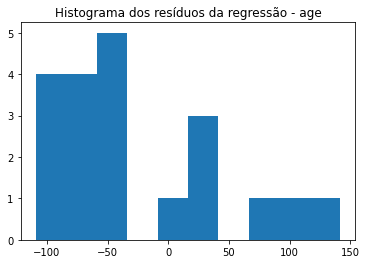

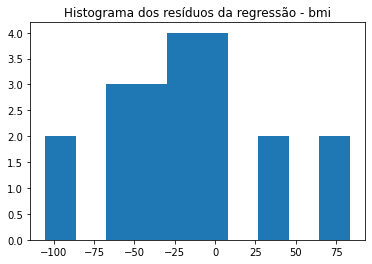

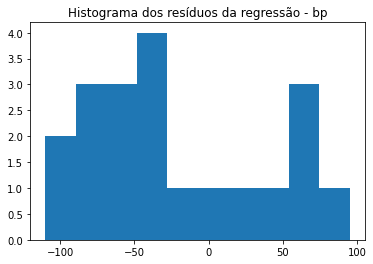

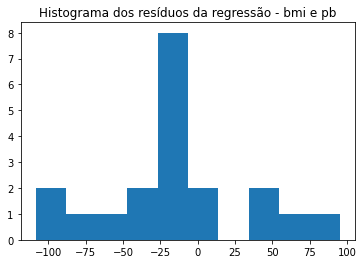

In [3]:
diabetes_y_pred = regr.predict(X_teste)

res = y_teste - diabetes_y_pred.reshape(-1,1)

plt.hist(res)
plt.title('Histograma dos resíduos da regressão - age')
plt.show()

# BMI
diabetes_y_pred_bmi = regr_bmi.predict(X_teste_bmi)
res_bmi = y_teste - diabetes_y_pred_bmi.reshape(-1,1)

plt.hist(res_bmi)
plt.title('Histograma dos resíduos da regressão - bmi')
plt.show()

# BP
diabetes_y_pred_bp = regr_bp.predict(X_teste_bp)
res_bp = y_teste - diabetes_y_pred_bp.reshape(-1,1)

plt.hist(res_bp)
plt.title('Histograma dos resíduos da regressão - bp')
plt.show()

# BMI_BP
diabetes_y_pred_bmi_bp = regr_bmi_bp.predict(X_teste_bmi_bp)
res_bmi_bp = y_teste - diabetes_y_pred_bmi_bp.reshape(-1,1)

plt.hist(res_bmi_bp)
plt.title('Histograma dos resíduos da regressão - bmi e pb')
plt.show()

**O que esse gráfico nos diz?**

In [4]:
p_value = normal_ad(res)[1]
print('p-value abaixo 0.05 geralmente significa não normal:', round(p_value[0],2))

p_value_bmi = normal_ad(res_bmi)[1]
print('p-value abaixo 0.05 geralmente significa não normal:', round(p_value_bmi[0],2))

p_value_bp = normal_ad(res_bp)[1]
print('p-value abaixo 0.05 geralmente significa não normal:', round(p_value_bp[0],2))

p_value_bmi_bp = normal_ad(res_bmi_bp)[1]
print('p-value abaixo 0.05 geralmente significa não normal:', round(p_value_bmi_bp[0],2))

p-value abaixo 0.05 geralmente significa não normal: 0.04
p-value abaixo 0.05 geralmente significa não normal: 0.51
p-value abaixo 0.05 geralmente significa não normal: 0.18
p-value abaixo 0.05 geralmente significa não normal: 0.15


In [5]:
print(r2_score(y_teste, diabetes_y_pred))

print(r2_score(y_teste, diabetes_y_pred_bmi))

r2_score(y_teste, diabetes_y_pred_bp))

r2_score(y_teste, diabetes_y_pred_bmi_bp))

0.46539551641633004

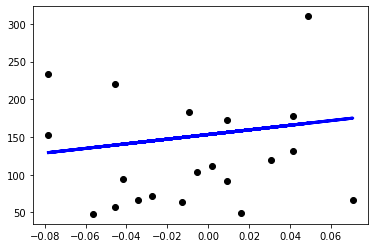

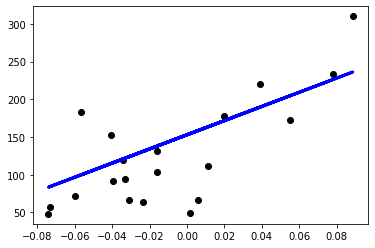

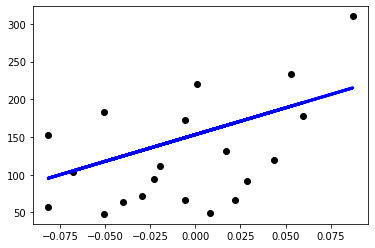

In [6]:
plt.scatter(X_teste, y_teste,  color='black')
plt.plot(X_teste, diabetes_y_pred, color='blue', linewidth=3)
plt.show()

plt.scatter(X_teste_bmi, y_teste,  color='black')
plt.plot(X_teste_bmi, diabetes_y_pred_bmi, color='blue', linewidth=3)
plt.show()

plt.scatter(X_teste_bp, y_teste,  color='black')
plt.plot(X_teste_bp, diabetes_y_pred_bp, color='blue', linewidth=3)
plt.show()

É possível saber se duas variáveis possuem alguma relação entre si dentro de um conjunto de dados?

Sem aprofundar nos conceitos estatísticos, podemos dizer que a correlação indica a interdependência entre duas ou mais variáveis. São vários métodos para calcular, um dos mais conhecidos é Coeficiente de Correlação de Pearson. Seu valor fica sempre entre -1 e 1. A correlação de Pearson, entretanto, mede a associação linear entre variáveis contínuas.

Calculamos a correlação com o módulo Pandas e sua função corr(), que irá retornarm a correlação de cada coluna com as outras colunas.

In [7]:
cr = tabela.corr()

print(cr)

          age       sex       bmi  ...        s5        s6         y
age  1.000000  0.173737  0.185085  ...  0.270777  0.301731  0.187889
sex  0.173737  1.000000  0.088161  ...  0.149918  0.208133  0.043062
bmi  0.185085  0.088161  1.000000  ...  0.446159  0.388680  0.586450
bp   0.335427  0.241013  0.395415  ...  0.393478  0.390429  0.441484
s1   0.260061  0.035277  0.249777  ...  0.515501  0.325717  0.212022
s2   0.219243  0.142637  0.261170  ...  0.318353  0.290600  0.174054
s3  -0.075181 -0.379090 -0.366811  ... -0.398577 -0.273697 -0.394789
s4   0.203841  0.332115  0.413807  ...  0.617857  0.417212  0.430453
s5   0.270777  0.149918  0.446159  ...  1.000000  0.464670  0.565883
s6   0.301731  0.208133  0.388680  ...  0.464670  1.000000  0.382483
y    0.187889  0.043062  0.586450  ...  0.565883  0.382483  1.000000

[11 rows x 11 columns]
